<center>

# Shenfun - High-Performance Computing platform for the Spectral Galerkin method

<div><img src="https://rawcdn.githack.com/spectralDNS/spectralutilities/f3419a3e6c40dad55be5dcca51f6e0e21713dd90/figures/Chebyshev_Polynomials_of_the_First_Kind.svg" width="300"></div>

<div class="sl-block" style="height: auto; width: 600px;">
    <div>
        <p><center style="font-size:1.2em">Professor Mikael Mortensen</p>
        <p><center>Department of Mathematics, University of Oslo</p>
        <p><center>Presented at the International Conference on Scientific Computing and Applications (ICSCA), Xiamen, China, 28/5 - 2019</p>
    </div>
</div>

# Shenfun - facts

1. Shenfun is named in honour of <strong>Professor Jie Shen</strong> for his seminal work on the spectral Galerkin method:-) 
2. Shenfun is a high performance computing platform for solving partial differential equations (PDEs) with the spectral Galerkin method (with numerical integration).
3. Shenfun has been run with 65,000 processors on a Cray XC40.
4. Shenfun is a high-level <strong>Python</strong> package originally developed for pseudo-spectral turbulence simulations.


<img src="https://rawcdn.githack.com/spectralDNS/spectralutilities/473129742f0b5f8d57e8c647809272c0ced99a45/movies/RB_200k_small.png" style="float:left" width="300"> <img src="https://rawcdn.githack.com/spectralDNS/spectralutilities/473129742f0b5f8d57e8c647809272c0ced99a45/movies/isotropic_cropped.gif" style="float:right" width="200"> 
<p style="clear: both;">

In [1]:
from shenfun import *
print('hello world')

hello world


# The Spectral Galerkin method

## Advantages

- Accuracy (spectral)
- Sparsity - very low memory use for coefficient matrices 
- Efficiency - Very fast linear algebra solvers
- Robustness (round-off errors) - condition numbers much lower than for collocation methods

## Disadvantages

- No complex grids. Structured tensor product grids only
- Nonlinear terms must be implemented explicitly (pseudospectral)
- Generally considered more difficult to implement since we solve equations in spectral space

# The Spectral Galerkin method (in a nutshell)

approximates solutions $u(x)$ using global <strong>trial</strong> functions $\phi_k(x)$ and unknown expansion coefficients $\hat{u}_k$

$$
u(x) = \sum_{k=0}^{N-1}\hat{u}_k \phi_k(x)
$$

Multidimensional solutions are formed from outer products of 1D bases

$$
u(x, y) = \sum_{k=0}^{N_0-1}\sum_{l=0}^{N_1-1}\hat{u}_{kl} \phi_{kl}(x, y)\quad \text{ or }\quad
u(x, y, z) = \sum_{k=0}^{N_0-1}\sum_{l=0}^{N_1-1} \sum_{m=0}^{N_2-1}\hat{u}_{klm} \phi_{klm}(x, y, z)
$$

where, for example

$$
\begin{align}
\phi_{kl}(x, y) &= T_k(x) L_l(y)\\
\phi_{klm}(x, y, z) &= T_k(x) L_l(y) \exp(\text{i}mz)
\end{align}
$$

$T_k$ and $L_k$ are Chebyshev and Legendre polynomials.

# The Spectral Galerkin method

solves PDEs, like Poisson's equation

\begin{align}
\nabla^2 u(x) &= f(x), \quad x \in [-1, 1] \\
u(\pm 1) &= 0
\end{align}

using variational forms by the <strong>method of weighted residuals</strong>. I.e., multiply PDE by a test function $v$ and integrate over the domain. For Poisson this leads to the problem:

Find $u \in H^1_0$ such that 

$$(\nabla u, \nabla v)_w^N = -(f, v)_w^N \quad \forall v \in H^1_0$$

Here $(u, v)_w^{N}$ is a weighted inner product and $v(=\phi_j)$ is a <strong>test</strong> function. Note that test and trial functions are the same for the Galerkin method.


# Weighted inner products

The weighted inner product is defined as

$$
 (u, v)_w = \int_{\Omega} u \overline{v} w \, d\Omega,
$$

where $w(\mathbf{x})$ is a weight associated with the chosen basis (different bases have different weights). The overline represents a complex conjugate (for Fourier).

$\Omega$ is a tensor product domain spanned by the chosen 1D bases.


# In Shenfun quadrature is used for the integrals

1D with Chebyshev basis:

$$
(u, v)_w ^N = \sum_{i=0}^{N-1} u(x_i) v(x_i) \omega_i \approx \int_{-1}^1 \frac{u v}{\sqrt{1-x^2}}  \, {dx},
$$

where $\{\omega_i\}_{i=0}^{N-1}$ are the quadrature weights associated with the chosen basis and quadrature rule. The associated quadrature points are denoted as $\{x_i\}_{i=0}^{N-1}$. 

2D with mixed Chebyshev-Fourier:

$$
(u, v)_w^N = \int_{-1}^1\int_{0}^{2\pi} \frac{u \overline{v}}{2\pi\sqrt{1-x^2}} \, {dxdy} \approx \sum_{i=0}^{N_0-1}\sum_{j=0}^{N_1-1} u(x_i, y_j) \overline{v}(x_i, y_j) \omega^{(x)}_i \omega_j^{(y)} ,
$$


# Spectral Galerkin solution procedure

1. Choose basis function(s) satisfying the correct boundary conditions
2. Transform PDEs to variational forms using inner products
3. Assemble variational forms and solve resulting linear algebra systems

# Orthogonal bases

<p style="margin-bottom:1cm;">

| Family    | Basis                                    | Domain    |
|  :---:    |         :---:                            |   :---:   |
| Chebyshev | $$\{T_k\}_{k=0}^{N-1}$$                  | $$[-1, 1]$$ |
| Legendre  | $$\{L_k\}_{k=0}^{N-1}$$                  | $$[-1, 1]$$ |
| Fourier   | $$\{\exp(\text{i}kx)\}_{k=-N/2}^{N/2-1}$$| $$[0, 2\pi]$$ |
| Hermite   | $$\{H_k\}_{k=0}^{N-1}$$                  | $$[-\infty, \infty]$$|
| Laguerre  | $$\{La_k\}_{k=0}^{N-1}$$                 | $$[0, \infty]$$ |


In [2]:
from shenfun import *
N = 8
C = Basis(N, 'Chebyshev', quad='GC', domain=[-2, 2])
L = Basis(N, 'Legendre')
x, w = C.points_and_weights()
print(L.points_and_weights())

(array([-0.96028986, -0.79666648, -0.52553241, -0.18343464,  0.18343464,
        0.52553241,  0.79666648,  0.96028986]), array([0.10122854, 0.22238103, 0.31370665, 0.36268378, 0.36268378,
       0.31370665, 0.22238103, 0.10122854]))


# Jie Shen's bases with Dirichlet bcs
<p style="margin-bottom:1cm;">


| family    | Basis                 | Boundary condition |
|-----------|-----------------------|----------|
| Chebyshev | $$\{T_k-T_{k+2}\}_{k=0}^{N-3}$$ | $$u(\pm 1) = 0$$ |
| Legendre  | $$\{L_k-L_{k+2}\}_{k=0}^{N-3}$$ | $$u(\pm 1) = 0$$ |
| Hermite   | $$\exp(-x^2)\{H_k\}_{k=0}^{N-1}$$ | $$u(\pm \infty) = 0$$ |
| Laguerre  | $$\exp(-x/2)\{La_k-La_{k+1}\}_{k=0}^{N-2}$$| $$u(0) = u(\infty) = 0$$ |

In [3]:
C0 = Basis(N, 'Chebyshev', bc=(0, 0))
L0 = Basis(N, 'Legendre', bc=(0, 0))
H0 = Basis(N, 'Hermite')
La = Basis(N, 'Laguerre', bc=(0, 0))

# Shen's bases with Neumann $u'(\pm 1) = 0$

<p style="margin-bottom:1cm;">

| family    | Basis                 |
|-----------|-----------------------|
| Chebyshev | $$\left\{T_k-\frac{k^2}{(k+2)^2}T_{k+2}\right\}_{k=0}^{N-3}$$ | 
| Legendre  | $$\left\{L_k-\frac{k(k+1)}{(k+2)(k+3)}L_{k+2}\right\}_{k=0}^{N-3}$$ |

In [4]:
CN = Basis(N, 'Chebyshev', bc='Neumann')
LN = Basis(N, 'Legendre', bc='Neumann')

# Shen's biharmonic bases $u(\pm 1) = u'(\pm 1) = 0$
<p style="margin-bottom:1cm;">

| family    | Basis                 |
|-----------| :-----------------:   |
| Chebyshev | $$\left\{T_k-\frac{2(k+2)}{k+3}T_{k+2}+\frac{k+1}{k+3} T_{k+4}\right\}_{k=0}^{N-5}$$ | 
| Legendre  | $$\left\{L_k-\frac{2(2k+5)}{(2k+7)}L_{k+2}+\frac{2k+3}{2k+7}L_{k+4}\right\}_{k=0}^{N-5}$$ |


In [5]:
CB = Basis(N, 'Chebyshev', bc='Biharmonic')
LB = Basis(N, 'Legendre', bc='Biharmonic')

# Multidimensional tensor product spaces
<p style="margin-bottom:0.5cm;">

$$
\begin{align}
L_0 &= \{L_k(x)-L_{k+2}(x)\}_{k=0}^{N-3} \\
C_0 &= \{T_k(x)-T_{k+2}(x)\}_{k=0}^{N-3} \\
L_1 &= \{L_l(y)\}_{l=0}^{N-1} \\
LL(x, y) &= L_0(x) \times L_1(y) \\
CL(x, y) &= C_0(x) \times L_1(y)
\end{align}
$$


In [6]:
L0 = Basis(N, 'Legendre', bc=(0, 0))
C0 = Basis(N, 'Chebyshev', bc=(0, 0))
L1 = Basis(N, 'Legendre')
LL = TensorProductSpace(comm, (L0, L1)) # comm is MPI.COMM_WORLD
CL = TensorProductSpace(comm, (C0, L1))
V = VectorTensorProductSpace(LL) # For vector valued functions
f = Array(LL)
print(f.shape)

(8, 8)


# Challenge 1

Create a 3-dimensional tensor product space for a scalar $u$, with problem described by

$$ 
\begin{align}
\Omega &= [-1, 1]\times[-1, 1] \times [0, 2\pi] \\
u(\pm 1, y, z) &= 0 \\
u'(x, \pm 1, z) &= 0 \\
u(x, y, 2\pi) &= u(x, y, 0)
\end{align}
$$


In [7]:
L0 = Basis(N, 'Legendre', bc=(0, 0))
L1 = Basis(N, 'Chebyshev', bc='Neumann')
F2 = Basis(N, 'Fourier', dtype='d')
T = TensorProductSpace(comm, (L0, L1, F2))
f = Array(T)
print(f.dtype)
help(project)

float64
Help on function project in module shenfun.forms.project:

project(uh, T, output_array=None)
    Project ``uh`` to tensor product space ``T``
    
    Find :math:`u \in T`, such that
    
    .. math::
    
        (u - u_h, v)_w^N = 0 \quad \forall v \in T
    
    Parameters
    ----------
    uh : Instance of either one of
        - :class:`.Expr`
        - :class:`.BasisFunction`
        - :class:`.Array`
        - A sympy function
    T : :class:`.TensorProductSpace` or :class:`.MixedTensorProductSpace`
    output_array : :class:`.Function`
        Return array
    
    Returns
    -------
    Function
        The projection of ``uh`` in T
    
    See Also
    --------
    :func:`.inner`
    
    Example
    -------
    
    >>> import numpy as np
    >>> from mpi4py import MPI
    >>> from shenfun import Basis, project, TensorProductSpace, Array, \
    ...     Function, Dx
    >>> N = 16
    >>> comm = MPI.COMM_WORLD
    >>> T0 = Basis(N, 'C')
    >>> K0 = Basis(N, 'F', 

# Operators in shenfun

Act on instances of a `TestFunction`, `TrialFunction` or `Function`

- div
- grad
- curl
- Dx (partial derivative)

# Assembly
- project
- inner

In [8]:
L0 = Basis(N, 'Legendre', bc=(0, 0))
L1 = Basis(N, 'Legendre')
u = TrialFunction(L0)
v = TestFunction(L0)
uh = Function(L0)
g = Array(L0)
du = grad(u)  # vector valued expression
h = div(du)   # scalar valued expression

A = inner(Dx(u, 0, 3), v)
print(A.diags().todense())

[[   0.  -30.    0.  -54.    0.  -78.]
 [   0.    0.  -70.    0. -110.    0.]
 [   0.    0.    0. -126.    0. -182.]
 [   0.    0.    0.    0. -198.    0.]
 [   0.    0.    0.    0.    0. -286.]
 [   0.    0.    0.    0.    0.    0.]]


# The shenfun `Function` represents the solution

`uh = Function(L0)`

$$
u_h(x) = \sum_{k=0}^{N-1} \hat{u}_k \phi_{k}(x)
$$

The function evaluated for all quadrature points, $\{x_j\}_{j=0}^{N-1}$, is an `Array`

`uj = Array(L0)`

There is a (fast) `backward` transform for moving from `Function` to `Array`, and a `forward` transform to go the other way.

In [9]:
uj = Array(L0)
uj = uh.backward(uj)
uh = uj.forward(uh)

# Projections

Project $g(\mathbf{x})$ to $V$:

Find $u$ in $V$ such that:

$$(u, v)_w = (Ig, v)_w \quad \text{for} \, v \in V $$

where $Ig$ is $\{g(x_j)\}_{j=0}^{N-1}$, i.e., $g(x)$ evaluated on the quadrature mesh.

Works if $g(x)$ is 

- an `Array`, which is exactly a `Function` evaluated on the mesh
- an expression involving a `Function`, like `div(grad(uh))`
- a `sympy` expression, like `sin(x)`





In [10]:
dudx = project(Dx(uh, 0, 1), L1) # Compute du/dx
wh = project(uj, L1)
import sympy as sp
x, y = sp.symbols('x,y')
ws = project(sp.sin(4*x), L1)

# Challenge 2

Create a shenfun `Function` that corresponds to the Chebyshev polynomial $T_2(x)=2x^2-1$

Compute the derivative of this `Function` using `project` and `Dx` and verify that it equals $4x$.

# Challenge 3

Create a `sympy` function

$$f(x, y) = sin(4x)cos(3y)$$

Project $f(x, y)$ to an orthogonal 2D Chebyshev space. Project then $\nabla f$ to a vector tensor product space. Compare the results with that obtained by using `sympy` to compute the derivatives.


# Implementation details

In [11]:
F0 = Basis(N, 'F', dtype='D')
F1 = Basis(N, 'F', dtype='D')
F2 = Basis(N, 'F', dtype='d')
FF = TensorProductSpace(comm, (F0, F1, F2))
uh = Function(FF)
ua = Array(FF)
ua[:] = np.random.random(ua.shape)
uh = ua.forward(uh)
du = div(grad(uh))
V = VectorTensorProductSpace(FF)
vv = Function(V)
c = curl(vv)
ch = project(c, V)

# Implementation matches mathematics
<p style="margin-bottom:1cm;">

$$
A = (\nabla u, \nabla v)_w^N
$$

In [12]:
A = inner(grad(u), grad(v))

In [13]:
print(A)

{0: array([ 6., 10., 14., 18., 22., 26.])}


In [14]:
print(A.diags().todense())

[[ 6.  0.  0.  0.  0.  0.]
 [ 0. 10.  0.  0.  0.  0.]
 [ 0.  0. 14.  0.  0.  0.]
 [ 0.  0.  0. 18.  0.  0.]
 [ 0.  0.  0.  0. 22.  0.]
 [ 0.  0.  0.  0.  0. 26.]]


A diagonal stiffness matrix!

# Complete Poisson solver with error verification in 1D


In [15]:
# Solve Poisson's equation
import matplotlib.pyplot as plt
from sympy import symbols, sin, cos, lambdify
from shenfun import * 

# Use sympy to compute manufactured solution
x, y = symbols("x,y")
ue = sin(6*np.pi*x)*(1-x**2) # `ue` is the manufactured solution
fe = ue.diff(x, 2) # `fe` is Poisson's right hand side for `ue`

SD = Basis(20, 'L', bc=(0, 0))
u = TrialFunction(SD)
v = TestFunction(SD)

b = inner(v, Array(SD, buffer=fe)) # Array is initialized with `fe`
A = inner(v, div(grad(u)))

uh = Function(SD)
uh = A.solve(b, uh) # Very fast solver due to Jie Shen
print(uh.backward()-Array(SD, buffer=ue))

[-0.07034889  0.10559306 -0.13141724  0.15190623 -0.16768243  0.17732851
 -0.17773218  0.16627795 -0.14612379  0.12945053 -0.12945053  0.14612379
 -0.16627795  0.17773218 -0.17732851  0.16768243 -0.15190623  0.13141724
 -0.10559306  0.07034889]


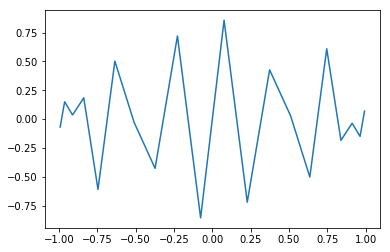

In [16]:
plt.plot(SD.mesh(), uh.backward())

# 2D - still closely matching mathematics

In [17]:
L0 = Basis(N, 'Legendre', bc=(0, 0))
F1 = Basis(N, 'Fourier', dtype='d')
TP = TensorProductSpace(comm, (L0, F1))
u = TrialFunction(TP)
v = TestFunction(TP)
A = inner(grad(u), grad(v))

In [18]:
print(A)

[<shenfun.matrixbase.TPMatrix object at 0x116544278>, <shenfun.matrixbase.TPMatrix object at 0x116544710>]


# ? 

A is a list of two TPMatrix objects???


# `TPMatrix` is a Tensor Product matrix

A `TPMatrix` is the outer product of smaller matrices (2 in 2D, 3 in 3D etc).  

Consider the inner product:

$$
\begin{align}
(\nabla u, \nabla v)_w &= \frac{1}{2\pi}\int_{-1}^{1}\int_{0}^{2\pi} \left(\frac{\partial u}{\partial x}, \frac{\partial u}{\partial y}\right) \cdot \left(\frac{\partial \overline{v}}{\partial x}, \frac{\partial \overline{v}}{\partial y}\right) {dxdy} \\
(\nabla u, \nabla v)_w &= \frac{1}{2\pi}\int_{-1}^1 \int_{0}^{2\pi} \frac{\partial u}{\partial x}\frac{\partial \overline{v}}{\partial x} {dxdy} + \int_{-1}^1 \int_{0}^{2\pi} \frac{\partial u}{\partial y}\frac{\partial \overline{v}}{\partial y} {dxdy}
\end{align}
$$

which, like `A`, is a sum of two terms. These two terms are the two `TPMatrix`es returned by `inner` above.

Now each one of these two terms can be written as the outer product of two smaller matrices. 

Consider the first, inserting for test and trial functions

$$
\begin{align}
v &= \phi_{kl} = (L_k(x)-L_{k+2}(x))\exp(\text{i}ly) \\
u &= \phi_{mn}
\end{align}
$$

The first term becomes

$$
\small
\begin{align}
\int_{-1}^1 \int_{0}^{2\pi} \frac{\partial u}{\partial x}\frac{\partial \overline{v}}{\partial x} \frac{dxdy}{2\pi} &= \underbrace{\int_{-1}^1 \frac{\partial (L_m-L_{m+2})}{\partial x}\frac{\partial (L_k-L_{k+2})}{\partial x} {dx}}_{a_{km}} \underbrace{\int_{0}^{2\pi}  \exp(iny) \exp(-ily) \frac{dy}{2\pi}}_{\delta_{ln}} \\
   &= a_{km} \delta_{ln}
\end{align}
$$

and the second

$$
\small
\begin{align}
\int_{-1}^1 \int_{0}^{2\pi} \frac{\partial u}{\partial y}\frac{\partial \overline{v}}{\partial y} \frac{dxdy}{2\pi} &= \underbrace{\int_{-1}^1 (L_m-L_{m+2})(L_k-L_{k+2}) {dx}}_{b_{km}} \underbrace{\int_{0}^{2\pi} ln \exp(iny) \exp(-ily)\frac{dy}{2\pi}}_{l^2\delta_{ln}} \\
   &= l^2 b_{km} \delta_{ln}
\end{align}
$$

All in all:

$$
(\nabla u, \nabla v)_w = \left(a_{km} \delta_{ln} + l^2 b_{km} \delta_{ln}\right)
$$

$$
(\nabla u, \nabla v)_w = \left(a_{km} \delta_{ln} + l^2 b_{km} \delta_{ln}\right)
$$

In [19]:
A = inner(grad(u), grad(v)) # <- list of two TPMatrices
print(A[0].mats)
print('Or as dense matrices:')
for mat in A[0].mats:
    print(mat.diags().todense())

[{0: array([ 6., 10., 14., 18., 22., 26.])}, {0: 1}]
Or as dense matrices:
[[ 6.  0.  0.  0.  0.  0.]
 [ 0. 10.  0.  0.  0.  0.]
 [ 0.  0. 14.  0.  0.  0.]
 [ 0.  0.  0. 18.  0.  0.]
 [ 0.  0.  0.  0. 22.  0.]
 [ 0.  0.  0.  0.  0. 26.]]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [20]:
print(A[1].mats[0].diags().todense())
#print(A[1].scale) # l^2

[[ 2.4         0.         -0.4         0.          0.          0.        ]
 [ 0.          0.95238095  0.         -0.28571429  0.          0.        ]
 [-0.4         0.          0.62222222  0.         -0.22222222  0.        ]
 [ 0.         -0.28571429  0.          0.46753247  0.         -0.18181818]
 [ 0.          0.         -0.22222222  0.          0.37606838  0.        ]
 [ 0.          0.          0.         -0.18181818  0.          0.31515152]]


# 3D Poisson (with MPI and Fourier x 2)

In [21]:
from sympy import symbols, sin, cos, lambdify
from shenfun import *

# Use sympy to compute manufactured solution
x, y, z = symbols("x,y,z")
ue = (cos(4*x) + sin(2*y) + sin(4*z))*(1-x**2)
fe = ue.diff(x, 2) + ue.diff(y, 2) + ue.diff(z, 2)

C0 = Basis(32, 'Chebyshev', bc=(0, 0))
F1 = Basis(32, 'Fourier', dtype='D')
F2 = Basis(32, 'Fourier', dtype='d')
T = TensorProductSpace(comm, (C0, F1, F2))
u = TrialFunction(T)
v = TestFunction(T)

# Assemble left and right hand
f_hat = inner(v, Array(T, buffer=fe))
A = inner(v, div(grad(u)))

# Solve
solver = chebyshev.la.Helmholtz(*A) # Very fast solver due to Jie Shen
u_hat = Function(T)
u_hat = solver(u_hat, f_hat)
assert np.linalg.norm(u_hat.backward()-Array(T, buffer=ue)) < 1e-12
print(u_hat.shape)

(32, 32, 17)


# Contour plot of slice with constant y

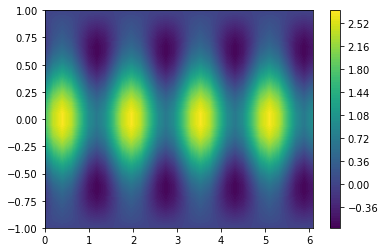

In [22]:
X = T.local_mesh()
ua = u_hat.backward()
plt.contourf(X[2][0, 0, :], X[0][:, 0, 0], ua[:, 2], 100)
plt.colorbar()

# Run with MPI distribution of arrays

Here we would normally run from a bash shell
<p style="margin-bottom:0.5cm;">

<div style="color:black"> <strong>[bash shell] mpirun -np 4 python poisson3D.py </strong> </div>

But since we are in a Jupyter notebook lets actually do this from python in a live cell:-)

In [23]:
import subprocess
subprocess.check_output('mpirun -np 4 python poisson3D.py', shell=True)

b'(32, 16, 8)\n(32, 16, 8)\n(32, 16, 9)\n(32, 16, 9)\n'

Note that Fourier bases are especially attractive because of features easily handled with MPI:

    - diagonal matrices
    - fast transforms

# Nonlinearities (convolution)
All treated with pseudo-spectral techniques

$$
\begin{align}
\hat{w}_k &= \widehat{u^2}_k
\end{align}
$$

That is, transform `Function`s to real space `Array`s, perform the nonlinear operation there and transform the nonlinear product back to spectral space (to a `Function`).

3/2-rule or 2/3-rule is possible for dealiasing with Fourier. Not for the remaining bases.

In [24]:
uj = Array(SD)
#uj[:] = np.random.random(uj.shape)
uj = uh.backward(uj)
wh = Function(SD)
wh = SD.forward(uj*uj, wh)

# Challenge 3

## Implement nonlinear solver for
<p style="margin-bottom:1cm;">

$$
\begin{align}
\nabla^2 u(x) + \alpha |\nabla u(x)|^2 &= -1, \quad x \in [-1, 1]\\
u(\pm 1) = 0 &\text{ and } \alpha \in \mathbb{R^+}
\end{align}
$$

Note that if $\alpha=0$ then obviously $u(x) = a_0+a_1x-0.5x^2$. This solution can be realized with basis function $T_0(x)-T_2(x)$, which equals $2(1-x^2)$, and which is the first basis function in the space

$$
V = \text{span}\{T_k-T_{k+2}\}_{k=0}^{N-3}
$$

In other words, for $u$ in $V$ the solution is $\hat{u}_0 = 0.25$ and $\hat{u}_k = 0$ for all $k=1, 2, \ldots$.

$$
\begin{align}
u(x) &= \sum_{k=0}^{N-3}\hat{u}_k (T_k-T_{k+2}) = 0.25(1-(2x^2-1)) \\
     &= 0.5(1-x^2)
\end{align}
$$

This is a good initial guess to find the nonlinear solution when $\alpha>0$! What is a good initial guess for Legendre? You need to iterate to find the solution when $\alpha > 0$!

# Mixed tensor product spaces

Solve several equations simultaneously

- Coupled equations
- Block matrices and vectors
- Tensor spaces of vectors, like velocity $u \in [\mathbb{R}^3]^3$

# Stokes equations
### lid-driven cavity - coupled solver
<p style="margin-bottom:0.25cm;">

$$
\begin{align*}
\nabla^2 \mathbf{u} - \nabla p &= \mathbf{f} \quad \text{in }  \Omega, \quad \quad \Omega = [-1, 1]\times[-1, 1]\\ 
\nabla \cdot \mathbf{u} &= h \quad \text{in } \Omega  \\ 
\int_{\Omega} p dx &= 0 \\
\mathbf{u}(\pm 1, y) = \mathbf{u}(x, -1) = (0, 0) &\text{ and }\mathbf{u}(x, 1) = (1, 0) \text{ or } ((1-x^2)(1+x^2), 0)
\end{align*}
$$

Given appropriate spaces $V$ and $Q$ a variational form reads: find $(\mathbf{u}, p) \in V \times Q$ such that 

$$
\begin{equation}
a((\mathbf{u}, p), (\mathbf{v}, q)) = L((\mathbf{v}, q)) \quad \forall (\mathbf{v}, q) \in V \times Q
\end{equation}
$$

where bilinear and linear forms are, respectively

$$
\begin{equation}
    a((\mathbf{u}, p), (\mathbf{v}, q)) = \int_{\Omega} (\nabla^2 \mathbf{u} - \nabla p) \cdot {\mathbf{v}} \, dx_w + \int_{\Omega} \nabla \cdot \mathbf{u} \, {q} \, dx_w,
\end{equation}
$$
$$
\begin{equation}  
    L((\mathbf{v}, q)) = \int_{\Omega} \mathbf{f} \cdot {\mathbf{v}}\, dx_w + \int_{\Omega} h {q} \, dx_w
\end{equation}
$$

Using integration by parts for Legendre

$$
\begin{equation}
    a((\mathbf{u}, p), (\mathbf{v}, q)) = -\int_{\Omega} \nabla \mathbf{u} \cdot \nabla{\mathbf{v}} \, dx_w + \int_{\Omega} \nabla \cdot \mathbf{v} \, {p} \, dx_w + \int_{\Omega} \nabla \cdot \mathbf{u} \, {q} \, dx_w,
\end{equation}
$$

# Implementation of spaces, basis functions

In [25]:
N = (40, 40)
family = 'Legendre'
D0X = Basis(N[0], 'Legendre', bc=(0, 0))
#D1Y = Basis(N[1], 'Legendre', bc=(1, 0)) # Regular lid
D1Y = Basis(N[1], 'Legendre', bc=((1-x)**2*(1+x)**2, 0)) # Regularized lid
D0Y = Basis(N[1], 'Legendre', bc=(0, 0))
PX = Basis(N[0], 'Legendre')
PY = Basis(N[1], 'Legendre')
PX.slice = lambda: slice(0, PX.N-2)
PY.slice = lambda: slice(0, PY.N-2)

# All required spaces
V1 = TensorProductSpace(comm, (D0X, D1Y))
V0 = TensorProductSpace(comm, (D0X, D0Y))
Q = TensorProductSpace(comm, (PX, PY))
V = MixedTensorProductSpace([V1, V0])
W = MixedTensorProductSpace([V0, V0])
VQ = MixedTensorProductSpace([V, Q])

# All required test and trial functions
up = TrialFunction(VQ)
vq = TestFunction(VQ)
u, p = up
v, q = vq

# Implementation Stokes - matrices and solve

In [26]:
# Assemble matrices
A = inner(grad(v), -grad(u))
G = inner(div(v), p)
D = inner(q, div(u))

# Extract the boundary matrices
bc_mats = extract_bc_matrices([A, G, D])

# Create Block matrix
M = BlockMatrix(A+G+D)
BM = BlockMatrix(bc_mats)

# Add contribution to rhs from inhomogeneous basis
up_hat = Function(VQ)
D1Y.bc.apply_after(up_hat[0][0], True) # due to inhomogen bcs
fh_hat = Function(VQ)
fh_hat = BM.matvec(-up_hat, fh_hat)

# Solve Stokes problem. Note constraint for pressure
up_hat = M.solve(fh_hat, u=up_hat, constraints=((2, 0, 0),)) 

# Move solution to Array in real space
up = up_hat.backward()
u_, p_ = up

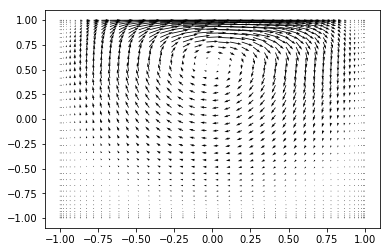

In [27]:
X = Q.local_mesh(True)
plt.quiver(X[0], X[1], u_[0], u_[1])

# Sparsity pattern of block matrix

$$
M =
  \begin{bmatrix}
      A[0]+A[1] & 0 & G[0] \\
      0 & A[2]+A[3] & G[1] \\ 
      D[0] & D[1] & 0
  \end{bmatrix}
$$

<IPython.core.display.Javascript object>


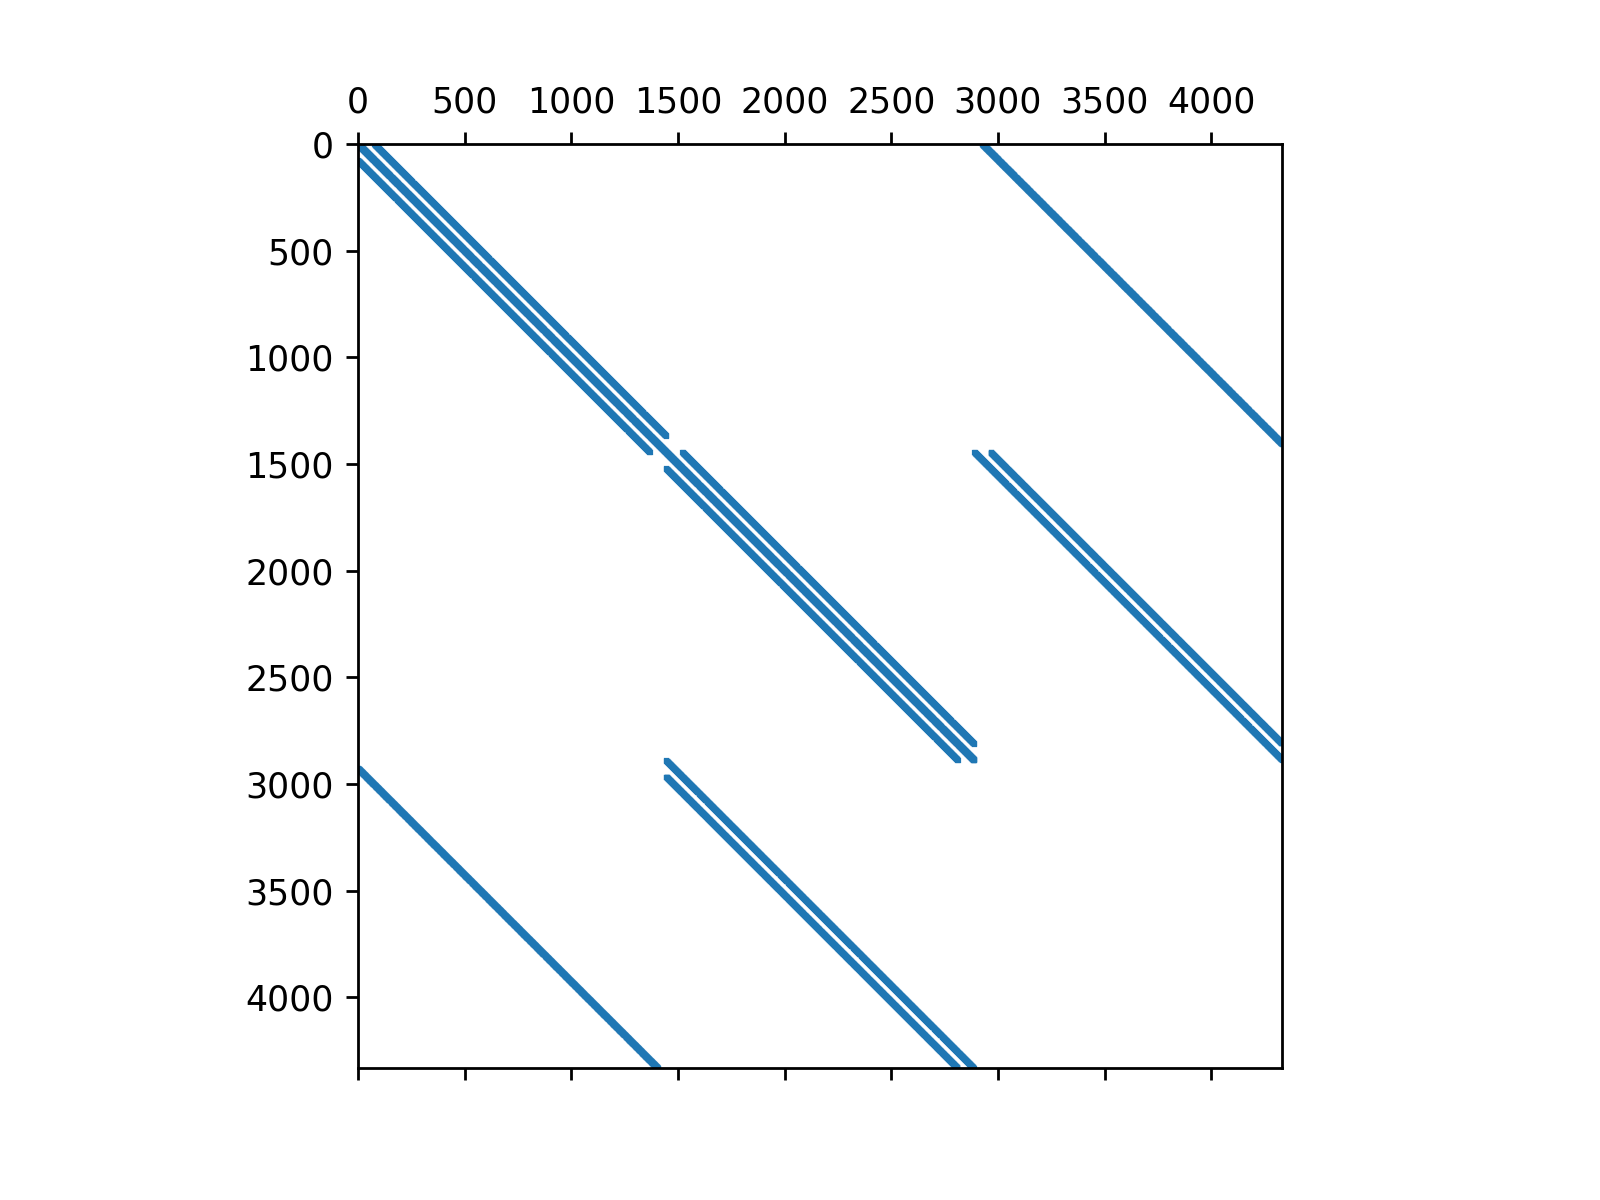

In [28]:
%matplotlib notebook
plt.spy(M.diags(), markersize=0.5)

# Block matrix

$$
M =
  \begin{bmatrix}
      A[0]+A[1] & 0 & G[0] \\
      0 & A[2]+A[3] & G[1] \\ 
      D[0] & D[1] & 0
  \end{bmatrix}
$$

where $D = G^T$ for the Legendre basis, making $M$ symmetric. For Chebyshev $M$ will not be symmetric.

Solver through [scipy.sparse.linalg](https://docs.scipy.org/doc/scipy/reference/sparse.linalg.html)

For Navier-Stokes of the lid-driven cavity, see https://github.com/spectralDNS/shenfun/blob/master/demo/NavierStokesDrivenCavity.py

<center>
    
# Thank you for your time😃

<img src="https://rawcdn.githack.com/spectralDNS/spectralutilities/473129742f0b5f8d57e8c647809272c0ced99a45/movies/RB_200k_small.png" style="float:left" width="300">

<img src="https://cdn.jsdelivr.net/gh/spectralDNS/spectralutilities@master/movies/Re2000_5.gif" width="400" height="133" style="float:right" alt="Channel flow"/>
<p style="clear: both;">

<img src="https://rawcdn.githack.com/spectralDNS/spectralutilities/473129742f0b5f8d57e8c647809272c0ced99a45/movies/isotropic_cropped.gif" style="float:left" width="250">

<img src="https://cdn.jsdelivr.net/gh/spectralDNS/spectralutilities@master/movies/KHmovie_3.gif" width="400" height="200" style="float:right" alt="Kelvin Helmholtz instability"/>

<p style="clear: both;">
